# Pandas Groupby with Transform() Implementation

# Student Behavioral Dataset

About Dataset

Student Performance & Behavior Dataset

* This dataset is real data of 5,000 records collected from a private learning provider.
* The dataset includes key attributes necessary for exploring patterns, correlations, and insights related to academic performance.

Columns:

* Student_ID: Unique identifier for each student.
* First_Name: Student’s first name.
* Last_Name: Student’s last name.
* Email: Contact email (can be anonymized).
* Gender: Male, Female, Other.
* Age: The age of the student.
* Department: Student's department (e.g., CS, Engineering, Business).
* Attendance (%): Attendance percentage (0-100%).
* Midterm_Score: Midterm exam score (out of 100).
* Final_Score: Final exam score (out of 100).
* Assignments_Avg: Average score of all assignments (out of 100).
* Quizzes_Avg: Average quiz scores (out of 100).
* Participation_Score: Score based on class participation (0-10).
* Projects_Score: Project evaluation score (out of 100).
* Total_Score: Weighted sum of all grades.
* Grade: Letter grade (A, B, C, D, F).
* Study_Hours_per_Week: Average study hours per week.
* Extracurricular_Activities: Whether the student participates in extracurriculars (Yes/No).
* Internet_Access_at_Home: Does the student have access to the internet at home? (Yes/No).
* Parent_Education_Level: Highest education level of parents (None, High School, Bachelor's, Master's, PhD).
* Family_Income_Level: Low, Medium, High.
* Stress_Level (1-10): Self-reported stress level (1: Low, 10: High).
* Sleep_Hours_per_Night: Average hours of sleep per night.

The Attendance is not part of the Total_Score or has very minimal weight.

Calculating the weighted sum:

Total Score=a⋅Midterm+b⋅Final+c⋅Assignments+d⋅Quizzes+e⋅Participation+f⋅Projects

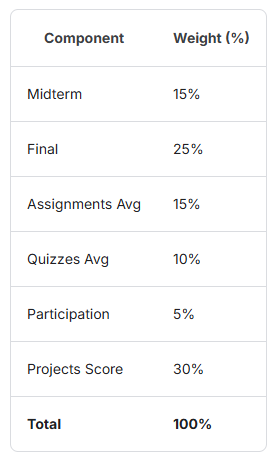

Dataset contains:

* Missing values (nulls): in some records (e.g., Attendance, Assignments, or Parent Education Level).
* Bias in some Datae (ex: grading e.g., students with high attendance get slightly better grades).
* Imbalanced distributions (e.g., some departments having more students).

# 1. Import the dataset

In [1]:
import pandas as pd

student = pd.read_csv('Students Performance Dataset.csv')

In [2]:
student.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [4]:
student.shape

(5000, 23)

# 2. Groupby() with transform

In Pandas, the transform() method, when used with groupby(), applies a function to each group and then "broadcasts" the result back to the original DataFrame or Series, ensuring the output has the same shape and index as the input.

It's a powerful tool for operations where you need to calculate a group-level statistic but want to retain the original data's structure (e.g., adding a new column to a DataFrame that contains the mean of a group for each row belonging to that group).

Syntax:

DataFrame.groupby(by=...).transform(func)

Precise Breakdown of transform():

* DataFrame.groupby(by=...): This part is your standard groupby operation, splitting the DataFrame into logical groups based on the by argument (e.g., one or more columns).
* .transform(func):
  * func: This is the function you want to apply to each group. It can be:
     * A string representing a common aggregation method (e.g., 'mean', 'sum', 'min', 'max', 'std', 'count', 'rank').
     * A Python function or lambda expression that can be applied to a Series (e.g., lambda x: x / x.sum()).
     * A list of functions/strings (if applying multiple transformations to a single column, though this is less common with transform directly producing a single output column, it can be used for multi-column transforms).

Key Characteristics of transform() Output:

* Shape Preservation: The most crucial characteristic is that the output Series or DataFrame will always have the exact same number of rows and the same index as the original DataFrame or the Series on which transform was called.
* Broadcasting: The result of the group-wise computation is assigned back to all rows within that group. For instance, if you calculate the mean of 'Score' for 'Department A', that same mean value will be assigned to every row belonging to 'Department A'.

When to Use transform() vs. agg():

* agg() (or direct aggregation like .mean(), .sum()): Used when you want to reduce the data. The output is a new Series or DataFrame with one row per group (e.g., df.groupby('Department')['Score'].mean() gives one mean score per department).
* transform(): Used when you want to broadcast a group-level calculation back to the original data's shape (e.g., df['Dept_Avg_Score'] = df.groupby('Department')['Score'].transform('mean') adds a new column where each student's row shows their department's average score).

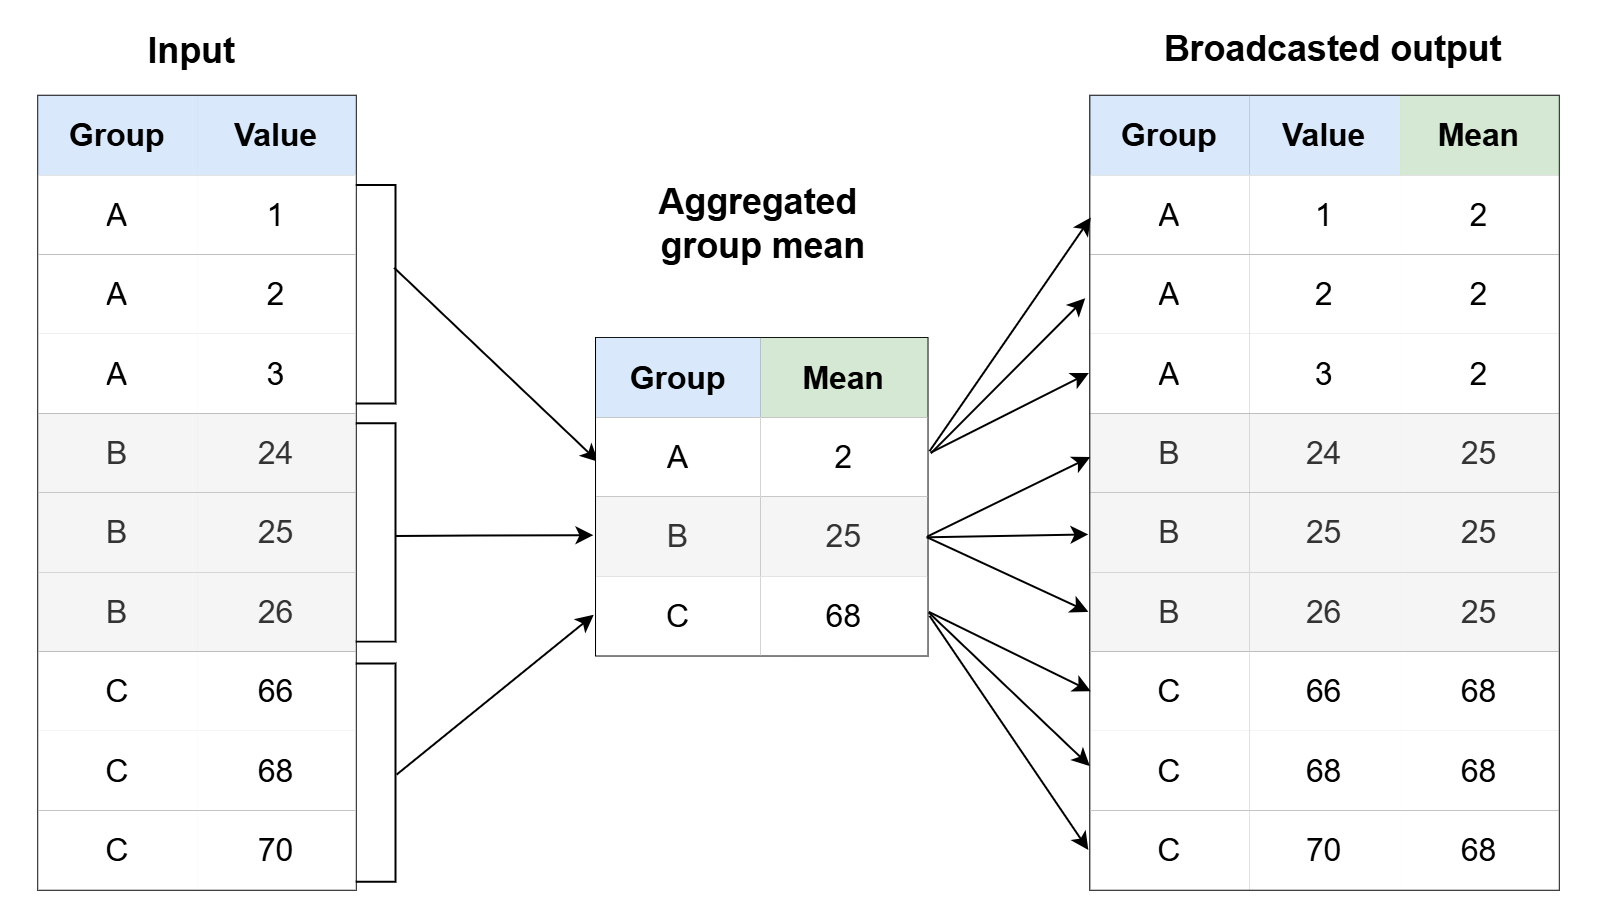

# 3. Data insights leveraging Groupby and transform()

* What is each student's Midterm_Score normalized by their Department's average Midterm_Score?
* What is the Total_Score for each student relative to the maximum Total_Score achieved within their Department?
* How does each student's Study_Hours_per_Week compare to the average Study_Hours_per_Week of students with the same Parent_Education_Level?
* What is the z-score of each student's Final_Score relative to their Department's Final_Score distribution?
* What is each student's Assignments_Avg as a percentage of the highest Assignments_Avg in their Family_Income_Level group?
* For each student, what is the count of students in their Department who have the same Gender?
* What is the deviation of each student's Sleep_Hours_per_Night from the average Sleep_Hours_per_Night within their Grade?
* What is the percentile rank of each student's Projects_Score within their Department?
* For each student, what is the average Stress_Level for students with the same Extracurricular_Activities status?
* What is the difference between each student's Quizzes_Avg and the minimum Quizzes_Avg in their Parent_Education_Level group?

### A. What is each student's Midterm_Score normalized by their Department's average Midterm_Score?

In [5]:
# Calculate the average Midterm_Score for each department using transform
# This operation returns a Series with the same index as the original DataFrame,
# containing the mean Midterm_Score for each student's respective department.

department_avg_midterm_score = student.groupby('Department')['Midterm_Score'].transform('mean')

# Calculate the normalized score
# Each student's Midterm_Score is divided by their department's average
student['Normalized_Midterm_Score_by_Dept_Avg'] = student['Midterm_Score'] / department_avg_midterm_score

In [6]:
# Print the original DataFrame with the new normalized column
student[['Student_ID', 'Department', 'Midterm_Score', 'Normalized_Midterm_Score_by_Dept_Avg']]

,Student_ID,Department,Midterm_Score,Normalized_Midterm_Score_by_Dept_Avg
0,S1000,Mathematics,40.61,0.571195
1,S1001,Business,57.27,0.810483
2,S1002,Engineering,41.84,0.590601
3,S1003,Engineering,45.65,0.644382
4,S1004,CS,53.13,0.756747
...,...,...,...,...
4995,S5995,CS,45.86,0.653198
4996,S5996,Mathematics,78.67,1.106523
4997,S5997,CS,50.84,0.724130
4998,S5998,Engineering,55.44,0.782574


### B. What is the Total_Score for each student relative to the maximum Total_Score achieved within their Department?

In [7]:
# Calculate the maximum Total_Score for each department using transform
# This will return a Series with the same index as the original DataFrame,
# where each student's row contains the max Total_Score for their department.
department_max_total_score = student.groupby('Department')['Total_Score'].transform('max')

# Calculate the Total_Score relative to the department's maximum
student['Total_Score_Relative_to_Dept_Max'] = student['Total_Score'] / department_max_total_score

In [9]:
# Print the original DataFrame with the new relative score column

student[['Student_ID', 'Department', 'Total_Score', 'Total_Score_Relative_to_Dept_Max']]

,Student_ID,Department,Total_Score,Total_Score_Relative_to_Dept_Max
0,S1000,Mathematics,59.8865,0.652067
1,S1001,Business,81.9170,0.877845
2,S1002,Engineering,67.7170,0.730875
3,S1003,Engineering,51.6535,0.557500
4,S1004,CS,71.4030,0.750887
...,...,...,...,...
4995,S5995,CS,53.5470,0.563110
4996,S5996,Mathematics,59.0240,0.642676
4997,S5997,CS,74.7560,0.786148
4998,S5998,Engineering,68.6585,0.741036


### C. How does each student's Study_Hours_per_Week compare to the average Study_Hours_per_Week of students with the same Parent_Education_Level?

In [10]:
# Calculate the average Study_Hours_per_Week for each Parent_Education_Level using transform
# This creates a Series where each student's row shows the average study hours for their parent's education level group

avg_study_hours_by_parent_education = student.groupby('Parent_Education_Level')['Study_Hours_per_Week'].transform('mean')

# Calculate the difference: individual study hours minus the group's average
student['Deviation_from_Parent_Edu_Avg'] = student['Study_Hours_per_Week'] - avg_study_hours_by_parent_education

In [11]:
# If you prefer a ratio (e.g., individual / group average)
# df['Ratio_to_Parent_Edu_Avg'] = df['Study_Hours_per_Week'] / avg_study_hours_by_parent_education
# Print the relevant columns to show the comparison

student[['Student_ID', 'Parent_Education_Level', 'Study_Hours_per_Week', 'Deviation_from_Parent_Edu_Avg']]

,Student_ID,Parent_Education_Level,Study_Hours_per_Week,Deviation_from_Parent_Edu_Avg
0,S1000,Master's,10.3,-6.992600
1,S1001,High School,27.1,9.602757
2,S1002,High School,12.4,-5.097243
3,S1003,High School,25.5,8.002757
4,S1004,Master's,13.3,-3.992600
...,...,...,...,...
4995,S5995,Master's,7.8,-9.492600
4996,S5996,NaN,24.2,NaN
4997,S5997,NaN,7.6,NaN
4998,S5998,PhD,14.5,-3.191107


### parents whose education_level is missing will not have Deviation_from_Parent_Edu_Avg calculation

### D. What is the z-score of each student's Final_Score relative to their Department's Final_Score distribution?

In [12]:
# Calculate the mean Final_Score for each department using transform

department_mean_final_score = student.groupby('Department')['Final_Score'].transform('mean')

# Calculate the standard deviation of Final_Score for each department using transform
department_std_final_score = student.groupby('Department')['Final_Score'].transform('std')

In [13]:
# Calculate the z-score for each student's Final_Score
# Handle cases where standard deviation might be 0 (e.g., all scores in a group are identical)
# In such cases, the z-score is undefined (division by zero), so we might get NaN or Inf.
# A common approach is to leave it as NaN or replace with 0 if std is 0.
# Here, we'll let it be NaN if std is 0, which is standard for z-scores.

student['Final_Score_Z_Score_by_Dept'] = (student['Final_Score'] - department_mean_final_score) / department_std_final_score

# Print the original DataFrame with the new z-score column

student[['Student_ID', 'Department', 'Final_Score', 'Final_Score_Z_Score_by_Dept']]

,Student_ID,Department,Final_Score,Final_Score_Z_Score_by_Dept
0,S1000,Mathematics,59.61,-0.548265
1,S1001,Business,74.00,0.227497
2,S1002,Engineering,63.85,-0.329081
3,S1003,Engineering,44.44,-1.453460
4,S1004,CS,61.77,-0.461541
...,...,...,...,...
4995,S5995,CS,45.63,-1.420767
4996,S5996,Mathematics,47.42,-1.259030
4997,S5997,CS,65.83,-0.220248
4998,S5998,Engineering,57.45,-0.699819


### E. What is each student's Assignments_Avg as a percentage of the highest Assignments_Avg in their Family_Income_Level group?

In [14]:
# Calculate the highest Assignments_Avg for each Family_Income_Level group using transform
# This will return a Series where each student's row contains the max Assignments_Avg
# for their family income level group.

family_income_level_max_assignments_avg = student.groupby('Family_Income_Level')['Assignments_Avg'].transform('max')

# Calculate each student's Assignments_Avg as a percentage of their group's highest
# Multiply by 100 to express as a percentage

student['Assignments_Avg_Pct_of_Group_Max'] = (student['Assignments_Avg'] / family_income_level_max_assignments_avg) * 100

In [15]:
# Print the original DataFrame with the new percentage column

student[['Student_ID', 'Family_Income_Level', 'Assignments_Avg', 'Assignments_Avg_Pct_of_Group_Max']]

,Student_ID,Family_Income_Level,Assignments_Avg,Assignments_Avg_Pct_of_Group_Max
0,S1000,Medium,73.69,73.704741
1,S1001,Low,74.23,74.237424
2,S1002,Low,85.85,85.858586
3,S1003,Low,68.10,68.106811
4,S1004,Medium,67.66,67.673535
...,...,...,...,...
4995,S5995,Medium,74.13,74.144829
4996,S5996,Medium,57.89,57.901580
4997,S5997,High,84.69,84.740845
4998,S5998,Medium,78.78,78.795759


### F. For each student, what is the count of students in their Department who have the same Gender?

In [16]:
# Group by 'Department' and 'Gender', then use transform('size') to get the count
# of students within each unique Department-Gender combination.
# The result will be broadcast back to each student's row.

student['Count_Same_Dept_Gender'] = student.groupby(['Department', 'Gender']).transform('size')

# Print the original DataFrame with the new count column

student[['Student_ID', 'Department', 'Gender', 'Count_Same_Dept_Gender']]

,Student_ID,Department,Gender,Count_Same_Dept_Gender
0,S1000,Mathematics,Female,629
1,S1001,Business,Male,630
2,S1002,Engineering,Male,687
3,S1003,Engineering,Female,587
4,S1004,CS,Female,599
...,...,...,...,...
4995,S5995,CS,Male,640
4996,S5996,Mathematics,Male,594
4997,S5997,CS,Female,599
4998,S5998,Engineering,Male,687


### G. What is the deviation of each student's Sleep_Hours_per_Night from the average Sleep_Hours_per_Night within their Grade?

In [17]:
# Calculate the average Sleep_Hours_per_Night for each Grade using transform
# This creates a Series where each student's row shows the average sleep hours for their grade

avg_sleep_hours_by_grade = student.groupby('Grade')['Sleep_Hours_per_Night'].transform('mean')

# Calculate the deviation: individual sleep hours minus the group's average

student['Deviation_from_Grade_Avg_Sleep'] = student['Sleep_Hours_per_Night'] - avg_sleep_hours_by_grade

In [18]:
# Print the relevant columns to show the comparison

student[['Student_ID', 'Grade', 'Sleep_Hours_per_Night', 'Deviation_from_Grade_Avg_Sleep']]

,Student_ID,Grade,Sleep_Hours_per_Night,Deviation_from_Grade_Avg_Sleep
0,S1000,F,5.9,-0.579928
1,S1001,B,4.3,-2.265047
2,S1002,D,6.1,-0.397898
3,S1003,F,4.9,-1.579928
4,S1004,C,4.5,-2.014348
...,...,...,...,...
4995,S5995,F,4.5,-1.979928
4996,S5996,F,7.2,0.720072
4997,S5997,C,6.6,0.085652
4998,S5998,D,5.9,-0.597898


### H. What is the percentile rank of each student's Projects_Score within their Department?

In [19]:
# Calculate the percentile rank of each student's Projects_Score within their Department.
# .rank(pct=True) returns the rank as a percentile (0-1 scale).
# Multiply by 100 to get a 0-100 scale percentile rank.

student['Projects_Score_Dept_Percentile_Rank'] = student.groupby('Department')['Projects_Score'].transform(lambda x: x.rank(pct=True)) * 100

# Print the original DataFrame with the new percentile rank column

student[['Student_ID', 'Department', 'Projects_Score', 'Projects_Score_Dept_Percentile_Rank']]

,Student_ID,Department,Projects_Score,Projects_Score_Dept_Percentile_Rank
0,S1000,Mathematics,62.84,26.819297
1,S1001,Business,98.23,96.281646
2,S1002,Engineering,91.22,82.496075
3,S1003,Engineering,55.48,10.243328
4,S1004,CS,87.43,73.849879
...,...,...,...,...
4995,S5995,CS,51.66,3.389831
4996,S5996,Mathematics,52.33,4.987735
4997,S5997,CS,97.89,96.690880
4998,S5998,Engineering,84.74,69.348509


### I. For each student, what is the average Stress_Level for students with the same Extracurricular_Activities status?

In [20]:
# Group by 'Extracurricular_Activities' and calculate the mean of 'Stress_Level'
# using transform. This broadcasts the group average back to each student's row.

student['Avg_Stress_Level_by_Extracurriculars'] = student.groupby('Extracurricular_Activities')['Stress_Level (1-10)'].transform('mean')

# Print the original DataFrame with the new average stress level column

student[['Student_ID', 'Extracurricular_Activities', 'Stress_Level (1-10)', 'Avg_Stress_Level_by_Extracurriculars']]

,Student_ID,Extracurricular_Activities,Stress_Level (1-10),Avg_Stress_Level_by_Extracurriculars
0,S1000,Yes,1,5.472532
1,S1001,No,4,5.542203
2,S1002,Yes,9,5.472532
3,S1003,No,8,5.542203
4,S1004,Yes,6,5.472532
...,...,...,...,...
4995,S5995,No,10,5.542203
4996,S5996,No,4,5.542203
4997,S5997,No,5,5.542203
4998,S5998,Yes,10,5.472532


### J. What is the difference between each student's Quizzes_Avg and the minimum Quizzes_Avg in their Parent_Education_Level group?

In [21]:
# Calculate the minimum Quizzes_Avg for each Parent_Education_Level group using transform
# This broadcasts the group's minimum quiz average back to each student's row.

min_quizzes_avg_by_parent_education = student.groupby('Parent_Education_Level')['Quizzes_Avg'].transform('min')

# Calculate the difference: individual Quizzes_Avg minus the group's minimum
student['Deviation_from_Group_Min_Quizzes_Avg'] = student['Quizzes_Avg'] - min_quizzes_avg_by_parent_education

In [22]:
# Print the relevant columns to show the difference

student[['Student_ID', 'Parent_Education_Level', 'Quizzes_Avg', 'Deviation_from_Group_Min_Quizzes_Avg']]

,Student_ID,Parent_Education_Level,Quizzes_Avg,Deviation_from_Group_Min_Quizzes_Avg
0,S1000,Master's,53.17,3.13
1,S1001,High School,98.23,48.23
2,S1002,High School,50.00,0.00
3,S1003,High School,66.27,16.27
4,S1004,Master's,83.98,33.94
...,...,...,...,...
4995,S5995,Master's,81.53,31.49
4996,S5996,NaN,85.96,NaN
4997,S5997,NaN,82.27,NaN
4998,S5998,PhD,55.96,5.96


# COMPLETED